In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Variablat e rastësishme

Para se të kuptojmë shpërndarjet propabilistike na duhet të kuptojmë se çka është variabla e rastësishme.

__Variabla e rastësishme__ është një variabël vlerat e të cilës vijnë nga një fenomen i rastësishëm. Pra, variablat e rastësishme janë variabla që nuk i kanë vlerat e përcaktuara apo të ditura.

Ato ndahen në dy kategori:
- Diskrete;
- Të vazhdueshme;

*Variablat e rastësishme diskrete* kanë numër të vlerave të numërueshëm. Për shembull, kur e hedhim zarin, ai ka vlerat e mundshme: {1, 2, 3, 4, 5, 6}. Shembuj tjetër është numri i thirrjeve. Ne mund ta numrojmë sa thirrje mund të kemi në ditë: {0, 1, 2, 3, ...}. 

*Variablat e rastësishme të vazhdueshme (kontinuele)*, në anën tjetër kanë numër të pafundëm vlerash. Për shembull pesha ka pafundësisht vlera të mundshme: {..., 70kg, 70.001kg, 70,0011kg, ...}.

# Funksioni propabilistik për variablat diskrete

Për shpërndarjet diskrete, funksioni propabilistik është funksioni që paraqet gjasat për secilën vlerë të mundshme të tij. Për shembull, për rastin e hudhjes së zarit: $p(x) = \frac{1}{6}$ për të gjitha vlerat e zarit.

Funksioni propabilistik ka këto dy veti:
- Të gjitha vlerat duhet të jenë mes 0 dhe 1 (Pra nuk ka gjasa negative ose gjasa më të mëdha sesa 1), dhe
- Shuma e të gjitha vlerave duhet të jetë e barabartë me 1.

*Për variablat diskrete ky funksion quhet funksioni i masës propabilistike (pmf).*

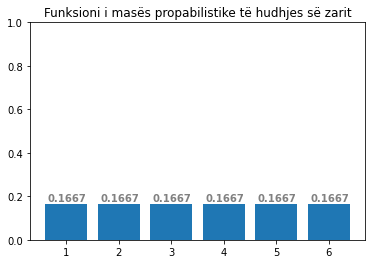

In [37]:
fig, ax = plt.subplots()
plt.bar(x=[i for i in range(1,7)], height=[1.0/6 for _ in range(6)])
for i in range(1, 7):
    ax.text(i-0.35, 0.01+1/6, str(round(1.0/6,4)), color='grey', fontweight='bold')
plt.ylim(0,1)
plt.title("Funksioni i masës propabilistike të hudhjes së zarit")
plt.show()

# Funksioni propabilistik për variablat e vazhdueshme

Për variablat e vazhdueshme nuk mund të flasim për gjasa për secilën vlerë të mundshme të variablës. Kjo sepse nga pafund vlera, gjasa që të marrim një vlerë të vetme shkon drejt zero. Prandaj, tek shpërndarjet e vazhdueshme flasim për një rang vlerash. Për shembull, flasim për gjasat që x të jetë mes 1 dhe 2.

Tek variablat e vazhdueshme funksioni që jep gjasat për secilën vlerë quhet *funksioni i dendësisë propabilistike (pdf)*.

Ky funksion ka këto veti:
- Ka vlerat mes 0 dhe 1;
- Sipërfaqja nën funksion është 1;

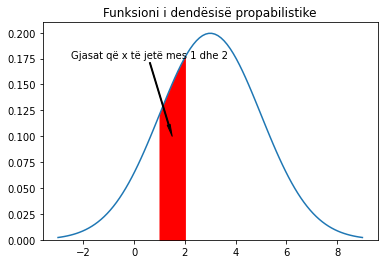

In [67]:
mu = 3
sigma = 2
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ptx = np.linspace(1, 2, 10)
pty = st.norm.pdf(ptx,mu,sigma)

fig = plt.figure()
ax = fig.add_subplot()

plt.fill_between(ptx, pty, color='red', alpha=1)
plt.title("Funksioni i dendësisë propabilistike")
plt.ylim(0, 0.21)
ax.annotate(
    "Gjasat që x të jetë mes 1 dhe 2", 
    xy=(1.5, 0.1), xytext=(-2.5, 0.175), 
    arrowprops=dict(facecolor='black', width=1, headwidth=3)
)
ax.plot(x, st.norm.pdf(x, mu, sigma))
plt.show()

Shpesh na duhen edhe gjasat që variabla të jetë më e vogël sesa një vlerë. Funksioni që na jep atë vlerë (P(X<=x)) quhet *funksioni i dendësisë kumulative (cumulative density function - cdf)*.

# Shpërndarjet propabilistike me Python

Shpërndarjet i marrim nga moduli scipy.stats (që e kam emëruar me shkurtesën st). Për shembull: *st.binom* është shpërndarja binomiale, *st.norm* është shpërndarja normale, *st.poisson* për shpërndarjen Poisson etj.

Më pas, për shpërndarjet diskrete mund të llogarisim gjasat që të ketë një vlerë me anë të metodës *pmf*. Për shembull me shpërndarja.pmf(1) marrim gjasat që variabla të ketë vlerën 1. Për shpërndarjet e vazhdueshme llogarinë mund ta bëjmë vetëm për intervale. Për shembull *st.norm()


In [72]:
# Shpërndarja binomiale

shperndarja_binomiale = st.binom(n=3, p=0.5)  # Shperndarje me numer te eksperimenteve 3 dhe me gjasa suksesi 0.5
print(shperndarja_binomiale.pmf(2)) # Gjasat qe te kemi dy suksese nga tri eksperimente
print(shperndarja_binomiale.cdf(2)) # Gjasat qe te kemi 0, 1, ose 2 suksese nga tri eksperimente

0.3750000000000001
0.875


In [75]:
#Shpërndarja Poisson

shperndarja_poisson = st.poisson(5) # Shperndarje Poisson me mesatare 5
print(shperndarja_poisson.pmf(3)) # Gjasat qe te kemi tri ngjarje
print(shperndarja_poisson.cdf(3)) # Gjasat qe te kemi 0, 1, 2 ose 3 ngjarje

0.1403738958142805
0.2650259152973616


In [80]:
# Shperndarja normale

shperndarja_normale = st.norm() # Mesatarja 0
print(shperndarja_normale.pdf(1)) # Lartesia e funksionit tek vlera 1- kjo nuk eshte propabiliteti qe vlera te jete 1
print(shperndarja_normale.cdf(1)) # Gjasat qe vlera te jete <=1
print(shperndarja_normale.cdf(2)-shperndarja_normale.cdf(1)) # Gjasat qe vlera te jete mes 1 dhe 2

0.24197072451914337
0.8413447460685429
0.13590512198327787


In [81]:
# Shperndarja t

shperndarja_t = st.t(14) # 14 shkalle lirie
print(shperndarja_t.pdf(1)) # Lartesia e pdf kur vlera eshte 1 - kjo nuk eshte propabiliteti qe vlera te jete 1
print(shperndarja_t.cdf(1)) # Gjasat qe vlera te jete <= 1
print(shperndarja_t.cdf(2)-shperndarja_t.cdf(1)) # Gjasat qe vlera te jete mes 1 dhe 2

0.23358082430431334
0.8328590283026713
0.1344969952527727


# Ushtrime

1) Jeni duke hulumtuar numrin e kalimtarëve në një rrugë në orë. Çfarë shpërndarje propabilistike ka kjo dukuri?

2) Jeni duke hulumtuar numrin e pacientëve të shtrirë në spital që shërohen nga një sëmundje. E dini që 93% të pacientëve shërohen. Aktualisht keni 14 pacientë. Çfarë shpërndarje duhet të përdorni. Gjeni gjasat që të gjithë pacientët tëshërohen. Gjeni gjasat që vetëm 8 pacientë të shërohen.

3) Jeni duke punuar për Amazon. E dini që shuma e blerjes ka shpërndarje normale me mesatare 132 Euro dhe devijim standard 22 Euro. Gjeni gjasat që një blerje tëje